<a href="https://colab.research.google.com/github/l-Monarch-l/Laborat/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%22%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2ipynb%22_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

   df = pd.read_csv('/content/diamond.csv')
   df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [ ]:
for column in df.columns:
  print(f'колонка: {column}')

колонка: Carat Weight
колонка: Cut
колонка: Color
колонка: Clarity
колонка: Polish
колонка: Symmetry
колонка: Report
колонка: Price


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   object 
 2   Color         6000 non-null   object 
 3   Clarity       6000 non-null   object 
 4   Polish        6000 non-null   object 
 5   Symmetry      6000 non-null   object 
 6   Report        6000 non-null   object 
 7   Price         6000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 375.1+ KB


In [ ]:
print(df.isnull().sum())

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'Price'] = np.nan

In [ ]:
print(df_test_nan.isnull().sum())

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           5
dtype: int64


In [ ]:
#Удаление строк с пропусками
# 1 способ
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum())


# Удаление строк с пропусками
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
# 2 способ
df_median = df_test_nan.copy()
df_median.Price = df_median.Price.fillna(df_median.Price.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum())


# Заполнение пропусков медианой
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
# 3 способ
df_mean = df_test_nan.copy()
df_mean.Price = df_mean.Price.fillna(df_median.Price.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum())


# Заполнение пропусков средним
Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64


In [ ]:
# TME - the most expensive - самы дорогой
df['TME_diamond'] = np.where(df['Price'] >= 15000, 1, 0).astype(int)

In [ ]:
df.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price', 'TME_diamond'],
      dtype='object')

In [ ]:
Y = df['TME_diamond']
X = df.drop('TME_diamond', axis=1)

X = X.drop('Price', axis=1)

In [ ]:
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,Carat Weight
0,1.10
1,0.83
2,0.85
3,0.91
4,0.83
...,...
5995,1.03
5996,1.00
5997,1.02
5998,1.27


In [ ]:
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,Carat Weight
0,1.10
1,0.83
2,0.85
3,0.91
4,0.83
...,...
5995,1.03
5996,1.00
5997,1.02
5998,1.27


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


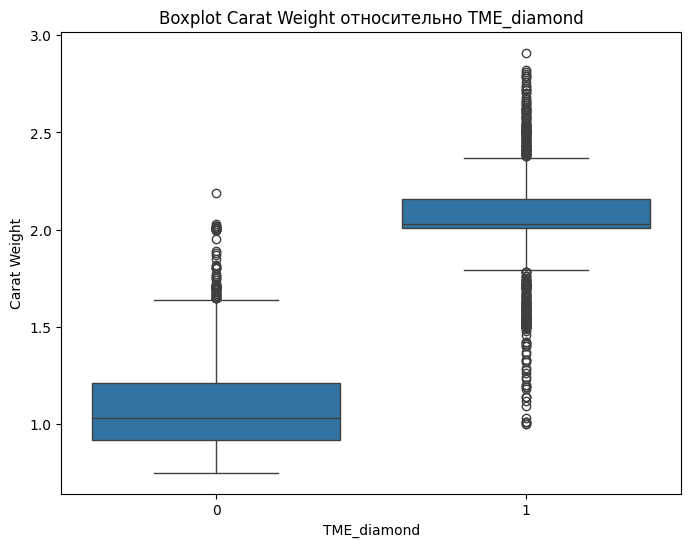

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='TME_diamond', y=col, data=df)
    plt.title(f'Boxplot {col} относительно TME_diamond')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

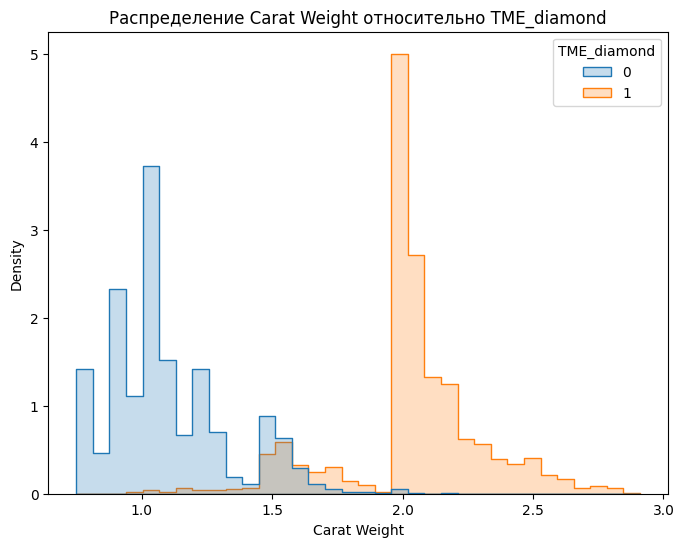

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='TME_diamond', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно TME_diamond')
    plt.show()

dddd

In [ ]:
desc_stats_numeric = df.groupby('TME_diamond')[df.select_dtypes(include=[np.number]).columns].describe()
desc_stats_categorical = df.groupby('TME_diamond')[df.select_dtypes(include=['object']).columns].describe()

In [ ]:
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('TME_diamond')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для Carat Weight:

              count      mean       std   min   25%   50%     75%   max
TME_diamond                                                            
0            4494.0  1.097421  0.231360  0.75  0.92  1.03  1.2100  2.19
1            1506.0  2.042039  0.270946  1.00  2.01  2.03  2.1575  2.91




Группа TME_diamond = 0
- Количество диамондов (count): 4494
- Среднее значение (mean): 1.10 вес
- Разброс (std): 0.23.
- Минимальное значение (min): 0.75, что является наименьшим весом в этой группе.
- 25%: не превышает 0.92 вес.
- 50%: не превышает 1.03 вес.
- 75%: не превышает 1.21 вес.
- Максимальное значение (max): 2.19, что является наибольшим весом в этой группе.

Группа TME_diamond = 1
- Количество диамондов (count): 1506
- Среднее значение (mean): 2.04 вес, что значительно выше среднего значения первой группы.
- Разброс (std): 0.27.
- Минимальное значение (min): 1.00, что также выше минимального значения первой группы.
- 25%: не превышает 2.01 вес.
- 50%: не превышает 2.03 вес.
- 75%: не превышает 2.16 вес.
- Максимальное значение (max): 2.91, что является наибольшим весом в данной группе.

Сравнение двух групп показывает, что группа TME_diamond = 1 имеет значительно больший средний вес по сравнению с группой TME_diamond = 0. Это может говорить о различиях в качестве или характеристиках бриллиантов между этими двумя группами, а также в цене. Разница в разбросе не критичная, группа с меткой 1 демонстрирует несколько более высокую вариативность в весах(об этом говорит что в первой группе минимальный вес(0.92 а максимальный 1.21, когда во второй минимальный вес 1 и максимальный достигает почти 3).

In [ ]:
print("\nКатегориальные переменные:")
print(desc_stats_categorical.to_string())


Категориальные переменные:
              Cut                         Color                  Clarity                   Polish                  Symmetry                  Report                  
            count unique        top  freq count unique top  freq   count unique  top  freq  count unique top  freq    count unique top  freq  count unique  top  freq
TME_diamond                                                                                                                                                          
0            4494      5  Very Good  1813  4494      6   G  1073    4494      6  SI1  1738   4494      4  VG  1818     4494      4  VG  1852   4494      2  GIA  3916
1            1506      5      Ideal   696  1506      6   G   428    1506      7  VS2   450   1506      4  EX   704     1506      4  EX   611   1506      2  GIA  1350


In [ ]:
for column in desc_stats_categorical.columns:
  print(f'колонка: {column}')

колонка: ('Cut', 'count')
колонка: ('Cut', 'unique')
колонка: ('Cut', 'top')
колонка: ('Cut', 'freq')
колонка: ('Color', 'count')
колонка: ('Color', 'unique')
колонка: ('Color', 'top')
колонка: ('Color', 'freq')
колонка: ('Clarity', 'count')
колонка: ('Clarity', 'unique')
колонка: ('Clarity', 'top')
колонка: ('Clarity', 'freq')
колонка: ('Polish', 'count')
колонка: ('Polish', 'unique')
колонка: ('Polish', 'top')
колонка: ('Polish', 'freq')
колонка: ('Symmetry', 'count')
колонка: ('Symmetry', 'unique')
колонка: ('Symmetry', 'top')
колонка: ('Symmetry', 'freq')
колонка: ('Report', 'count')
колонка: ('Report', 'unique')
колонка: ('Report', 'top')
колонка: ('Report', 'freq')



Cut

В выборке присутствуют два типа: TME_diamond 0 и TME_diamond 1.
Для TME_diamond 0:
  - Всего: 4494.
  - Уникальных категорий: 5.
  - Наиболее распространенная категория: Very Good, с частотой 1813.
  
Для TME_diamond 1:
  - Всего: 1506.
  - Уникальных категорий: 5.
  - Наиболее распространенная категория: Ideal, с частотой 696.

Color
ля TME_diamond 0:
  - Всего: 4494.
  - Уникальных категорий: 6.
  - Наиболее распространенная категория: G, с частотой 1073.

Для TME_diamond 1:
  - Всего: 1506.
  - Уникальных категорий: 6.
  - Наиболее распространенная категория: G, с частотой 428.

Clarity
Для TME_diamond 0:
  - Всего: 4494.
  - Уникальных категорий: 6.
  - Наиболее распространенная категория: SI1, с частотой 1738.

Для TME_diamond 1:
  - Всего: 1506.
  - Уникальных категорий: 7.
  - Наиболее распространенная категория: VS2, с частотой 450.

Polish
Для TME_diamond 0:
  - Всего: 4494.
  - Уникальных категорий: 4.
  - Наиболее распространенная категория: VG (Very Good), с частотой 1818.

Для TME_diamond 1:
  - Всего: 1506.
  - Уникальных категорий: 4.
  - Наиболее распространенная категория: EX (Excellent), с частотой 704.
  
Symmetry
Для TME_diamond 0:
  - Всего: 4494.
  - Уникальных категорий: 4.
  - Наиболее распространенная категория: VG, с частотой 1852.

Для TME_diamond 1:
  - Всего: 1506.
  - Уникальных категорий: 4.
  - Наиболее распространенная категория: EX, с частотой 611.

Report
Для TME_diamond 0:
  - Всего: 4494.
  - Уникальных категорий: 2.
  - Наиболее распространенная категория: GIA, с частотой 3916.

Для TME_diamond 1:
  - Всего: 1506.
  - Уникальных категорий: 2.
  - Наиболее распространенная категория: GIA, с частотой 1350.

Заключение

В целом, выборка содержит разнообразные категории для каждой переменной, однако некоторые категории, такие как "G" для цвета и "GIA" для отчета, являются наиболее распространенными в обеих подвыборках. Это может указывать на предпочтения покупателей или стандарты качества в данной выборке бриллиантов.


In [ ]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,Carat Weight,Price,TME_diamond
Carat Weight,1.000000,0.858562,0.861073
Price,0.858562,1.000000,0.815399
TME_diamond,0.861073,0.815399,1.000000


1. Carat Weight и Price
- Коэффициент корреляции: 0.858562
  - Это значение близко к 1, что указывает на сильную положительную линейную связь между весом и ценой. Это означает, что с увеличением веса цена бриллианта, как правило, также увеличивается.

2. Carat Weight и TME_diamond
- Коэффициент корреляции: 0.861073
  - Этот коэффициент также близок к 1, что говорит о сильной положительной связи между весом и категорией TME_diamond. Это может указывать на то, что более тяжелые бриллианты чаще относятся к более дорогим качества.
  
3. Price и TME_diamond
- Коэффициент корреляции: 0.815399
  - Хотя этот коэффициент немного ниже, он все равно указывает на значительную положительную связь между ценой и категорией TME_diamond. Это означает, что бриллианты в более высоких категориях качества имеют тенденцию иметь более высокую цену.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']


In [ ]:
X_processed = X.copy()

X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True)

In [ ]:
X_processed = X.copy()
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True)
X_processed

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,1.10,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0.83,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,0.85,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.91,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.83,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.03,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5996,1.00,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
5997,1.02,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5998,1.27,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['Carat Weight']


In [ ]:
scaler = MinMaxScaler()
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])
X_processed

,Carat Weight,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_E,Color_F,Color_G,Color_H,Color_I,...,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_G,Polish_ID,Polish_VG,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA
0,0.162037,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
1,0.037037,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,0.046296,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.074074,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
4,0.037037,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.129630,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5996,0.115741,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
5997,0.125000,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5998,0.240741,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [ ]:
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9829
Точность на тестовой выборке: 0.9833

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       899
           1       0.99      0.95      0.97       301

    accuracy                           0.98      1200
   macro avg       0.98      0.97      0.98      1200
weighted avg       0.98      0.98      0.98      1200



In [ ]:
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])

                Feature  Coefficient
0          Carat Weight    18.173933
9               Color_I    -2.690450
8               Color_H    -1.930517
11          Clarity_SI1    -1.724152
10           Clarity_IF     1.273448
7               Color_G    -1.140511
3   Cut_Signature-Ideal     0.866585
13          Clarity_VS2    -0.657094
14         Clarity_VVS1     0.594803
5               Color_E    -0.572256
6               Color_F    -0.455180
16             Polish_G    -0.424966
12          Clarity_VS1    -0.289896
21          Symmetry_VG    -0.263711
20          Symmetry_ID    -0.249478
17            Polish_ID    -0.222666
18            Polish_VG    -0.194554
2             Cut_Ideal     0.170752
15         Clarity_VVS2     0.167258
4         Cut_Very Good     0.126444
22           Report_GIA    -0.082770
1              Cut_Good     0.027430
19           Symmetry_G     0.002251


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.9820
Отклонение точности: 0.0035


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

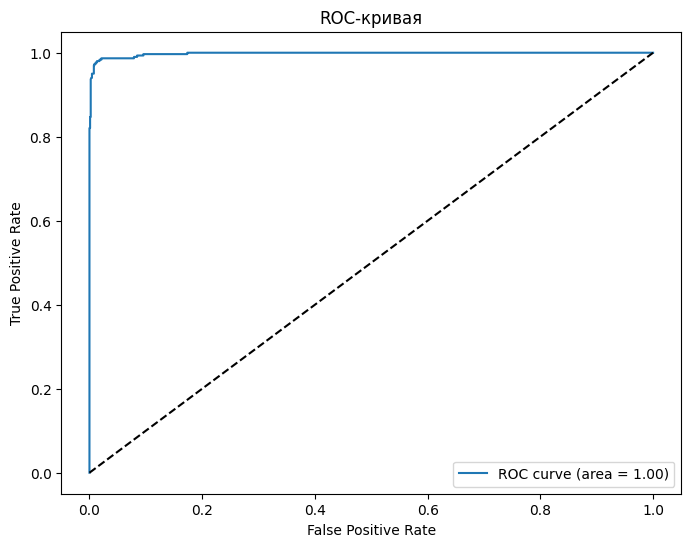

In [ ]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()